Md. Irfan Hossain, Senior Program Officer, Data Analyst, GIRL Center, Population Council

##### Objectives:
###### Model with numeric features only
 - Separating the numeric features and target variable
 - Spliting the original dataset into the train set (80%) and the test set (20%)
 - Performing Linear Regression and predicting the 'Price' from the test set
 - Finding the RMSE value from the actual test data and the predicted data

###### Model with all the features
 - Performing Label Encoding or One-hot Encoding
 - Spliting the original dataset into the train set (80%) and the test set (20%)
 - Perform Linear Regression and Predict the 'Price' from the test set
 - Showing the coefficients of the linear regression model for each feature and the y-intercept value of the linear regression model with interpretation
 - Finding the MAE, MAPE, MSE, RMSE, coefficient of determination values from the actual target variable and the predicted target variable
 - Comparing the actual and predicted target variable through visualization

#### Import required libraries and packages

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score 
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# to remove unnecessary warnings
import warnings

warnings.filterwarnings('ignore')

# to generate clear images
sns.set_context('talk')

#### Read data file as dataframe

In [2]:
df = pd.read_csv("audi.csv")

display(df.head(10))
print(df.shape)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
5,A1,2016,13900,Automatic,32260,Petrol,30,58.9,1.4
6,A6,2016,13250,Automatic,76788,Diesel,30,61.4,2.0
7,A4,2016,11750,Manual,75185,Diesel,20,70.6,2.0
8,A3,2015,10200,Manual,46112,Petrol,20,60.1,1.4
9,A1,2016,12000,Manual,22451,Petrol,30,55.4,1.4


(10668, 9)


###### Model with numeric features only
#### Detecting the numeric features

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [4]:
print(df.columns)

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')


#### Separating the numeric features and target variable

In [5]:
features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
target = ['price']

X = df[features]
y = df[target]

print(X.shape, y.shape)

(10668, 5) (10668, 1)


#### Spliting the original dataset into the train set (80%) and the test set (20%)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8534, 5) (2134, 5) (8534, 1) (2134, 1)


#### Performing Linear Regression

In [7]:
model = LinearRegression()
model = model.fit(X_train, y_train)

#### Predicting the 'Price' from the test set

In [8]:
y_pred = model.predict(X_test)
print(y_pred)

[[ 8745.08843655]
 [ 1603.78269133]
 [31795.56694294]
 ...
 [14863.76915344]
 [32226.54686985]
 [48291.34166661]]


#### Preliminary comparing with original price values of test set

In [9]:
display(y_test.head(3))
print(y_test.shape)

,price
7439,9995
9632,6790
1131,32500


(2134, 1)


#### Calculating RMSE value from the actual test data and the predicted data

In [10]:
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print(RMSE)

5694.210362957305


###### Model with all the features
#### One-hot Encoding

In [11]:
df = pd.get_dummies(df, drop_first=True)

display(df.head(3))
print(df.info())

,year,price,mileage,tax,mpg,engineSize,model_ A2,model_ A3,model_ A4,model_ A5,...,model_ S4,model_ S5,model_ S8,model_ SQ5,model_ SQ7,model_ TT,transmission_Manual,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Petrol
0,2017,12500,15735,150,55.4,1.4,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,2016,16500,36203,20,64.2,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2016,11000,29946,30,55.4,1.4,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    10668 non-null  int64  
 1   price                   10668 non-null  int64  
 2   mileage                 10668 non-null  int64  
 3   tax                     10668 non-null  int64  
 4   mpg                     10668 non-null  float64
 5   engineSize              10668 non-null  float64
 6   model_ A2               10668 non-null  uint8  
 7   model_ A3               10668 non-null  uint8  
 8   model_ A4               10668 non-null  uint8  
 9   model_ A5               10668 non-null  uint8  
 10  model_ A6               10668 non-null  uint8  
 11  model_ A7               10668 non-null  uint8  
 12  model_ A8               10668 non-null  uint8  
 13  model_ Q2               10668 non-null  uint8  
 14  model_ Q3               10668 non-null

#### Label Encoding
<br> Both encoding format were used but One-hot led model ends up with 90% Rsquared value where as Label encoded model had 78%.
Also the visualization shows too many negative predicted prices. Hence Label encoded are made to be seen as comments.

In [12]:
# LE = LabelEncoder()

# df['transmission'] = LE.fit_transform(df['transmission'])
# df['fuelType'] = LE.fit_transform(df['fuelType'])
# df['model'] = LE.fit_transform(df['model'])
# df['year'] = LE.fit_transform(df['year'])

# df['transmission'] = df['transmission'].astype('category')
# df['fuelType'] = df['fuelType'].astype('category')
# df['model'] = df['model'].astype('category')
# df['year'] = df['year'].astype('category')

# display(df.head(10))
# print(df.info())

#### Separating features and the target variable

In [13]:
target = ['price']

X = df.drop('price', axis=1)
y = df[target]

print(X.shape, y.shape)

(10668, 34) (10668, 1)


#### Spliting the original dataset into the train set (80%) and the test set (20%)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8534, 34) (2134, 34) (8534, 1) (2134, 1)


#### Performing Linear Regression

In [15]:
model = LinearRegression()
model = model.fit(X_train, y_train)

#### Predicting the 'Price' from the test set

In [16]:
y_pred = model.predict(X_test)
print(y_pred)

[[ 7000.85385355]
 [ 1665.15338363]
 [31627.0854268 ]
 ...
 [15329.62690154]
 [29751.71558792]
 [48349.27623439]]


#### Linear Regression Coefficients and intercept

In [17]:
coefficients = pd.DataFrame({'features':X.columns, 'coefficients':np.squeeze(model.coef_)})
coefficients = coefficients.sort_values(by='coefficients')
display(coefficients)

,features,coefficients
30,transmission_Manual,-1582.888762
33,fuelType_Petrol,-866.302186
3,mpg,-277.676837
2,tax,-27.400534
1,mileage,-0.078877
31,transmission_Semi-Auto,65.736442
6,model_ A3,1366.864741
12,model_ Q2,1435.383296
7,model_ A4,1677.271998
0,year,1831.625620


**Comment**: 
<br>1. For changing transmission type of the car from Automatic to Manual, the price reduces by USD 1582; from Automatic to Semi-Auto, the price increases by USD 65
<br>2. For one unit increase in mpg the price of the car reduces by USD 277.
<br>3. For one USD increase in road tax the price of the car reduces by USD 27.
<br>4. For one unit increase in mileage the price of the car reduces by USD 0.07.
<br>5. For changing type of fuel used of the car from Diesel to Petrol, the price reduces by USD 866; from Diesel to Hybrid, the price increases by USD 32,432
<br>6. For one year increase of the manufacturing year of the car, the price increases by USD 1831.
<br>7. For change of the size of the engine of the car, the price increases by USD 10739.
<br>8. For models, all the coefficients for different models are compared to model **A1**, and for all of the models have higher prices than model **A1**

In [18]:
model.intercept_

array([-3663242.78502934])

**Comment**: Considering no effect of all the features in this model, the car price is USD -3,663,243.

#### Calculating  MAE, MAPE, MSE, RMSE, coefficient of determination values

In [19]:
# mean absolute error
MAE = mean_absolute_error(y_test, y_pred)
print("mean absolute error = ", MAE)

# mean absolute percentage error
MAPE = mean_absolute_percentage_error(y_test, y_pred)
print("mean absolute percentage error = ", MAPE)

# mean squared error
MSE = mean_squared_error(y_test, y_pred)
print("mean squared error = ", MSE)

# root mean squared error
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print("root mean squared error = ", RMSE)

# coefficient of determination
r_squared = r2_score(y_test, y_pred) 
print("coefficient of determination = ", r_squared)

mean absolute error =  2564.4009944836243
mean absolute percentage error =  0.1301103188747503
mean squared error =  14668855.94503356
root mean squared error =  3829.9942486945797
coefficient of determination =  0.8979180953925855


#### Visualization of comparing the actual and predicted price

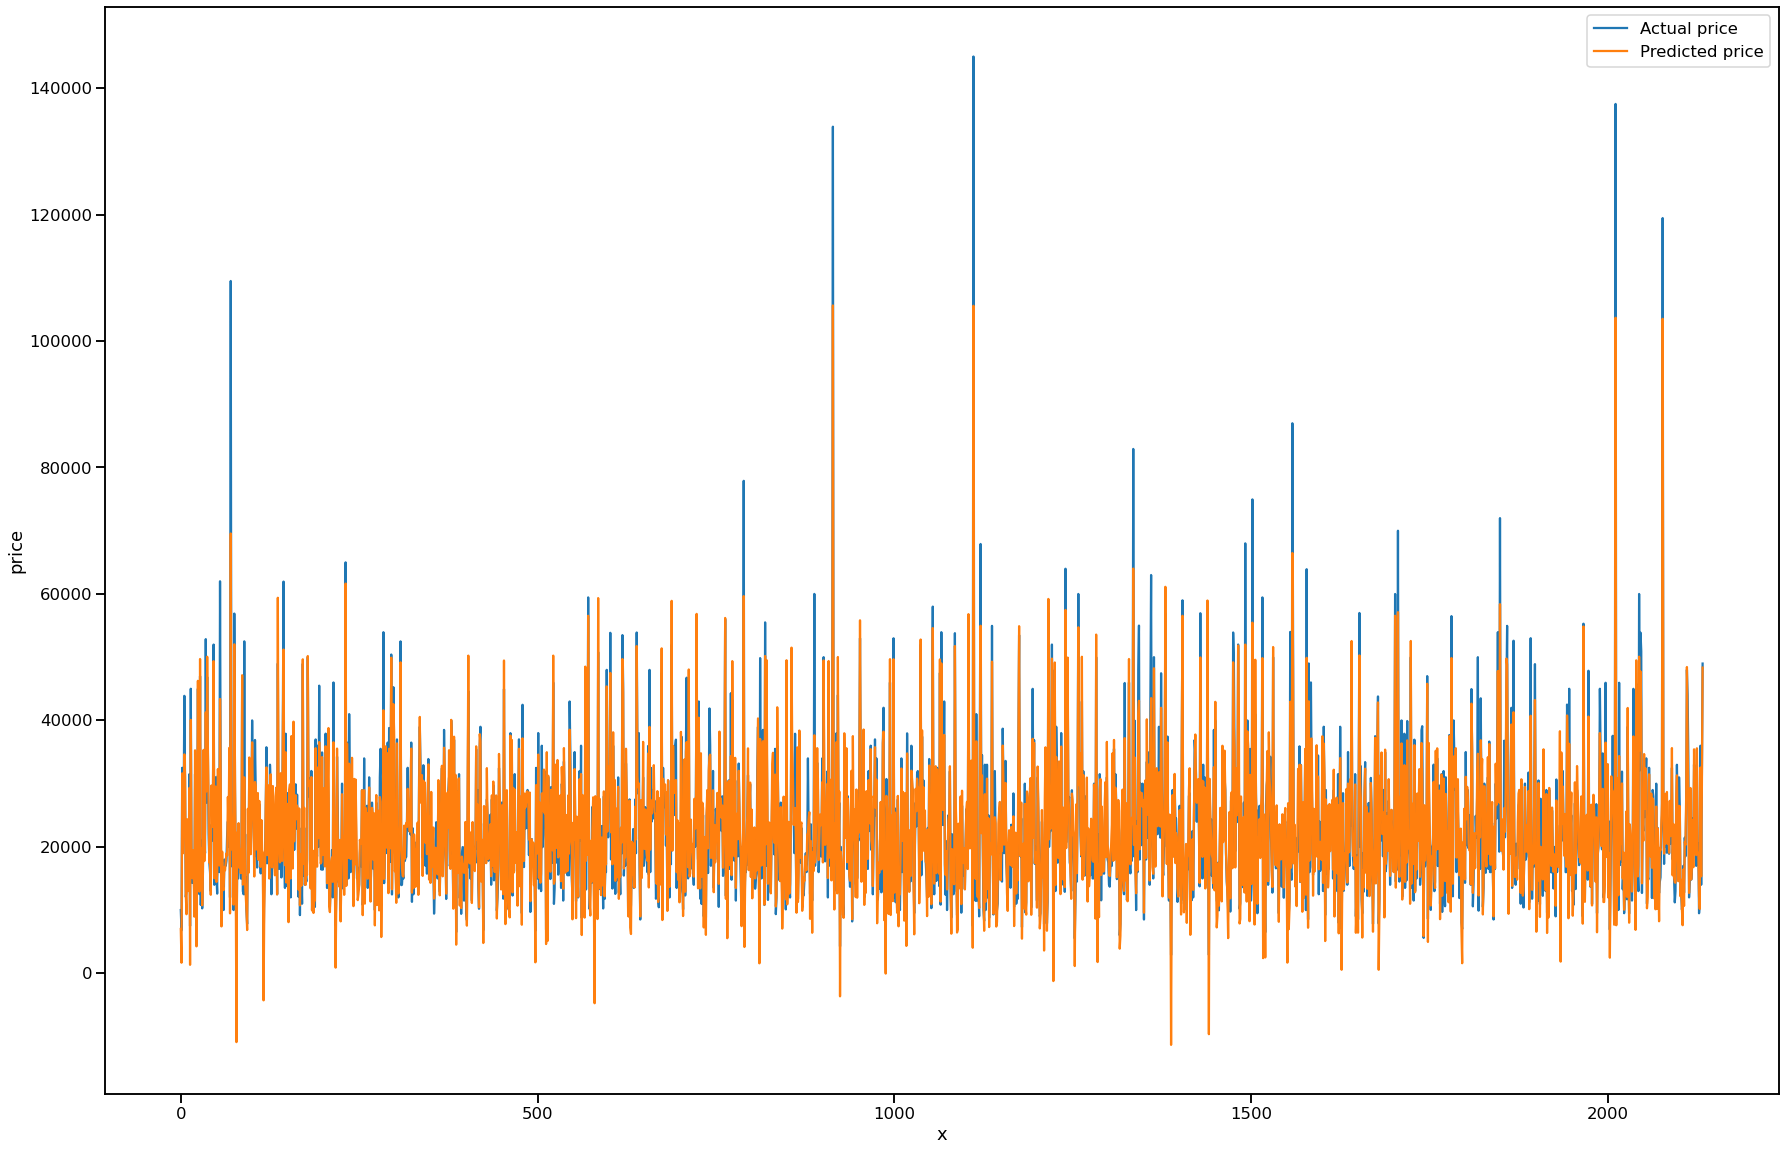

In [20]:
y_test['pred'] = y_pred
y_test['x'] = np.arange(0,y_test.shape[0],1).tolist()

plt.figure(figsize=(30,20))

sns.lineplot(x='x', y='price', data=y_test, label='Actual price')
sns.lineplot(x='x', y='pred', data=y_test, label='Predicted price')
plt.show()

**Comment:** The fitted model predicts prices lower than actual prices. Even though, 90% coefficients of determination informs the model is a good model (explaining ability of 90% of variablility the price by the features), this model is some-how recommended as the above figure shows that a few of the predicted prices are below USD 0